# 1.  Tokenization


### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

## Homework 4 part 1

In [2]:
import string
import re

wdict = {}

with open('Life_On_The_Mississippi.txt', 'r', encoding='utf-8-sig') as L:
    line = L.readline()
    nlines = 1
    while line:
        line = re.sub(r'[^\x00-\x7f]', '', line)   # to remove non-ASCII characters
        line = line.lstrip('\ufeff')  # Removing CHATBOT from beginning
        line = line.translate(str.maketrans('', '', string.punctuation)) # Removing punctuation
        line = line.lower()   #  normalize to lowercase

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0
maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems:
        break

('the', 9255)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('mississippi', 159)
('this', 781)
('is', 1148)
('for', 1095)
('use', 48)
('anyone', 5)
('anywhere', 18)
('in', 2593)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 68)
('at', 750)
('no', 422)
('cost', 25)
('with', 1081)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1033)
('may', 89)
('copy', 17)
('it', 2293)
('give', 81)
('away', 172)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 381)
('are', 387)
('not', 722)
('located', 9)
('will', 301)
('have', 571)
('to', 3592)
('check', 4)
('laws', 17)
('country', 77)
('where', 174)
('before', 208)
('using', 11)
('title', 3)
('author', 3)
('mark', 24)
('twain', 26)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1

## Homework 4 part 2

In [4]:
### Part 2

from operator import itemgetter # for 'sorted' to sort on the frequency.  See 'help(itemgetter)'.

witems = wdict.items()

print(list(witems)[:4])
#  [('the', 9255), ('project', 90), ('gutenberg', 87), ('ebook', 13)]


# This call to 'sorted' resorts witems by the second element of each entry, i.e. the frequency count 
sorted_witems = sorted(witems, key=itemgetter(1), reverse=True )

# Top 10 most frequent word tokens
print(list(sorted_witems)[:4])

for item in list(sorted_witems)[:10]:
    print (item)

#  top 90% of word occurrences
total_occurrences = sum(wdict.values())
counts = 0
top_90 = 0
for word, count in sorted_witems:
    counts += count
    top_90 += 1
    if counts >= (total_occurrences * 0.9):
        break

print("Total occurances: " , total_occurrences)
print("Number of distinct words making top occurrences", top_90 , " making" ,counts , "(" , round(counts/total_occurrences*100 , 3), "%)" )

[('the', 9255), ('project', 90), ('gutenberg', 87), ('ebook', 13)]
[('the', 9255), ('and', 5892), ('of', 4532), ('a', 4053)]
('the', 9255)
('and', 5892)
('of', 4532)
('a', 4053)
('to', 3592)
('in', 2593)
('it', 2293)
('i', 2205)
('was', 2093)
('that', 1724)
Total occurances:  147420
Number of distinct words making top occurrences 3732  making 132680 ( 90.001 %)


# 2.  Embedding
Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The vocabulary size is:  30522
(30522, 1024)
4000
10000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.191s
[t-SNE] Iteration 50: error = 97.8578186, gradie

<function matplotlib.pyplot.show(close=None, block=None)>

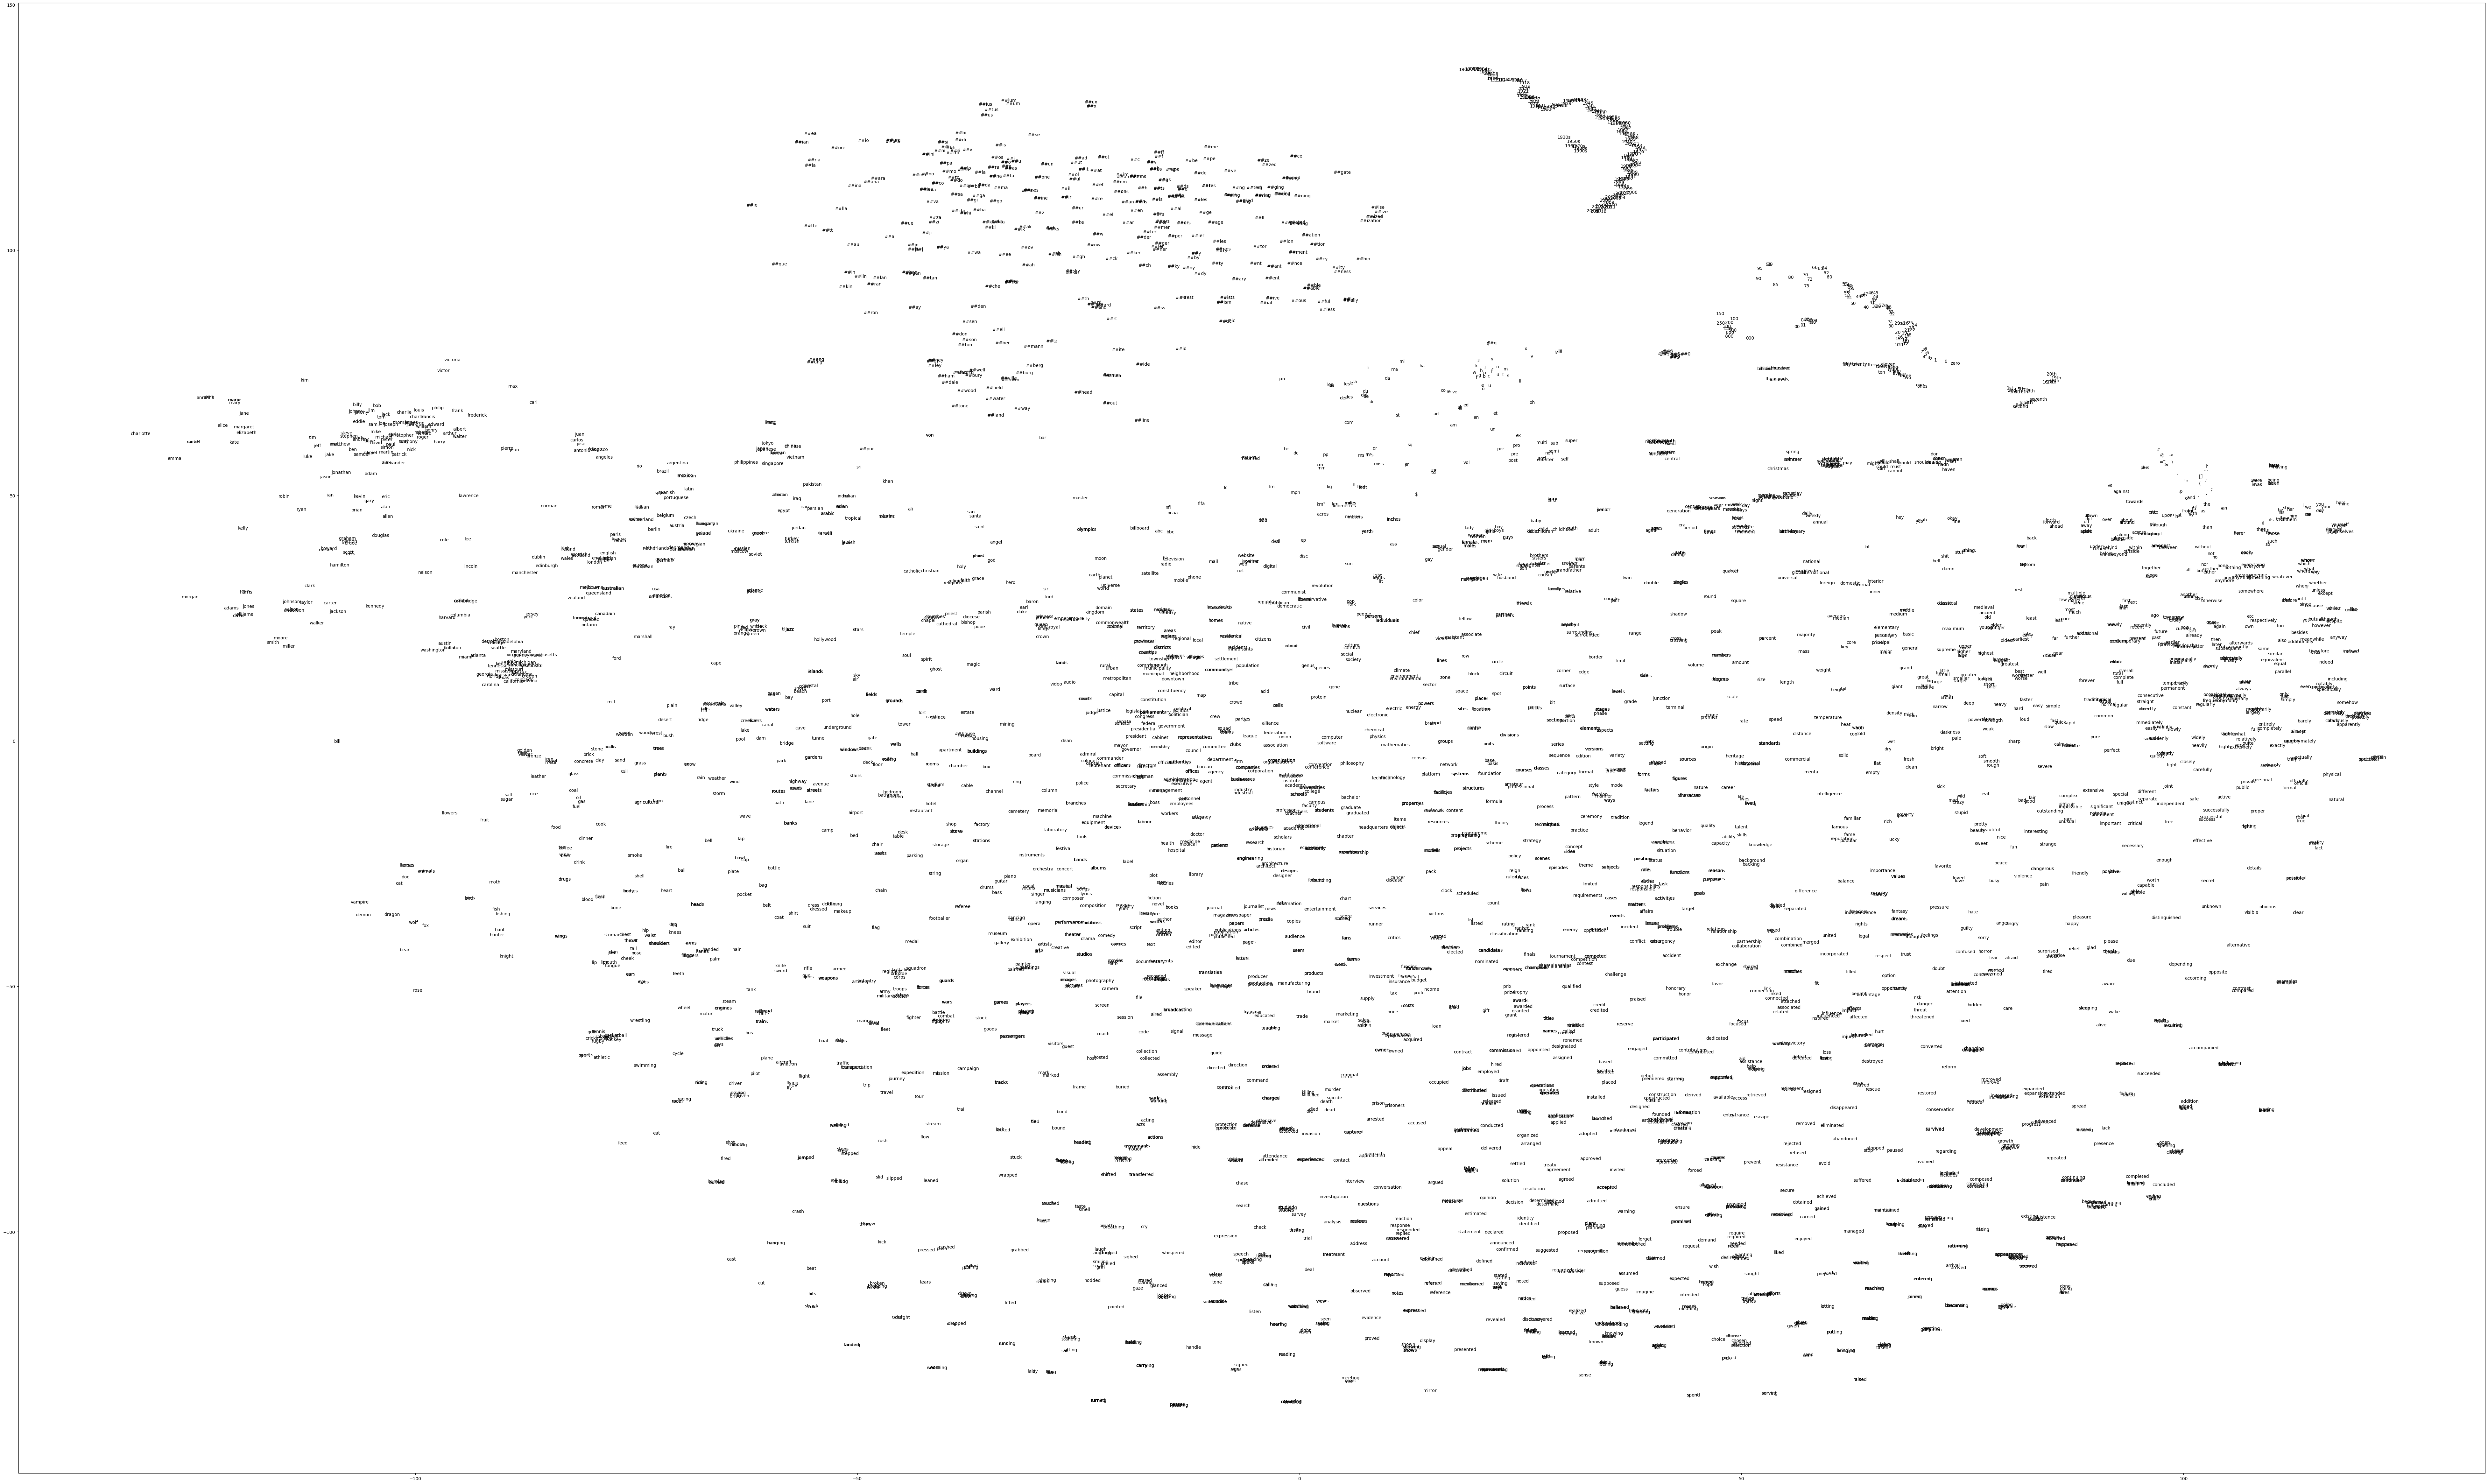

In [14]:


%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
# model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')

plt.show

In [20]:
filtered_indices

array([ 298,  317,  330,  331,  336,  354,  357,  362,  365,  393,  423,
        452,  486,  500,  524,  562,  594,  609,  707,  755,  790,  795,
        828,  854,  875,  894,  925,  957,  969, 1028, 1065, 1123, 1137,
       1174, 1186, 1218, 1240, 1264, 1313, 1329, 1353, 1367, 1369, 1394,
       1407, 1423, 1427, 1448, 1449, 1454, 1479, 1508, 1544, 1614, 1615,
       1619, 1692, 1714, 1767, 1773, 1826, 1845, 1894, 1906, 1913, 1919,
       1933, 1942, 1946, 1950, 1958, 1980, 1986, 1993, 2023, 2050, 2067,
       2074, 2119, 2120, 2153, 2188, 2199, 2202, 2328, 2334, 2339, 2415,
       2505, 2512, 2547, 2597, 2605, 2622, 2647, 2653, 2680, 2730, 2741,
       2807, 2832, 2866, 2882, 2917, 2924, 2946, 2949, 2953, 2995, 3004,
       3015, 3044, 3192, 3252, 3384, 3565, 3586, 3596, 3624, 3755, 3760,
       4313, 4709, 5743, 6944, 8544, 9623])

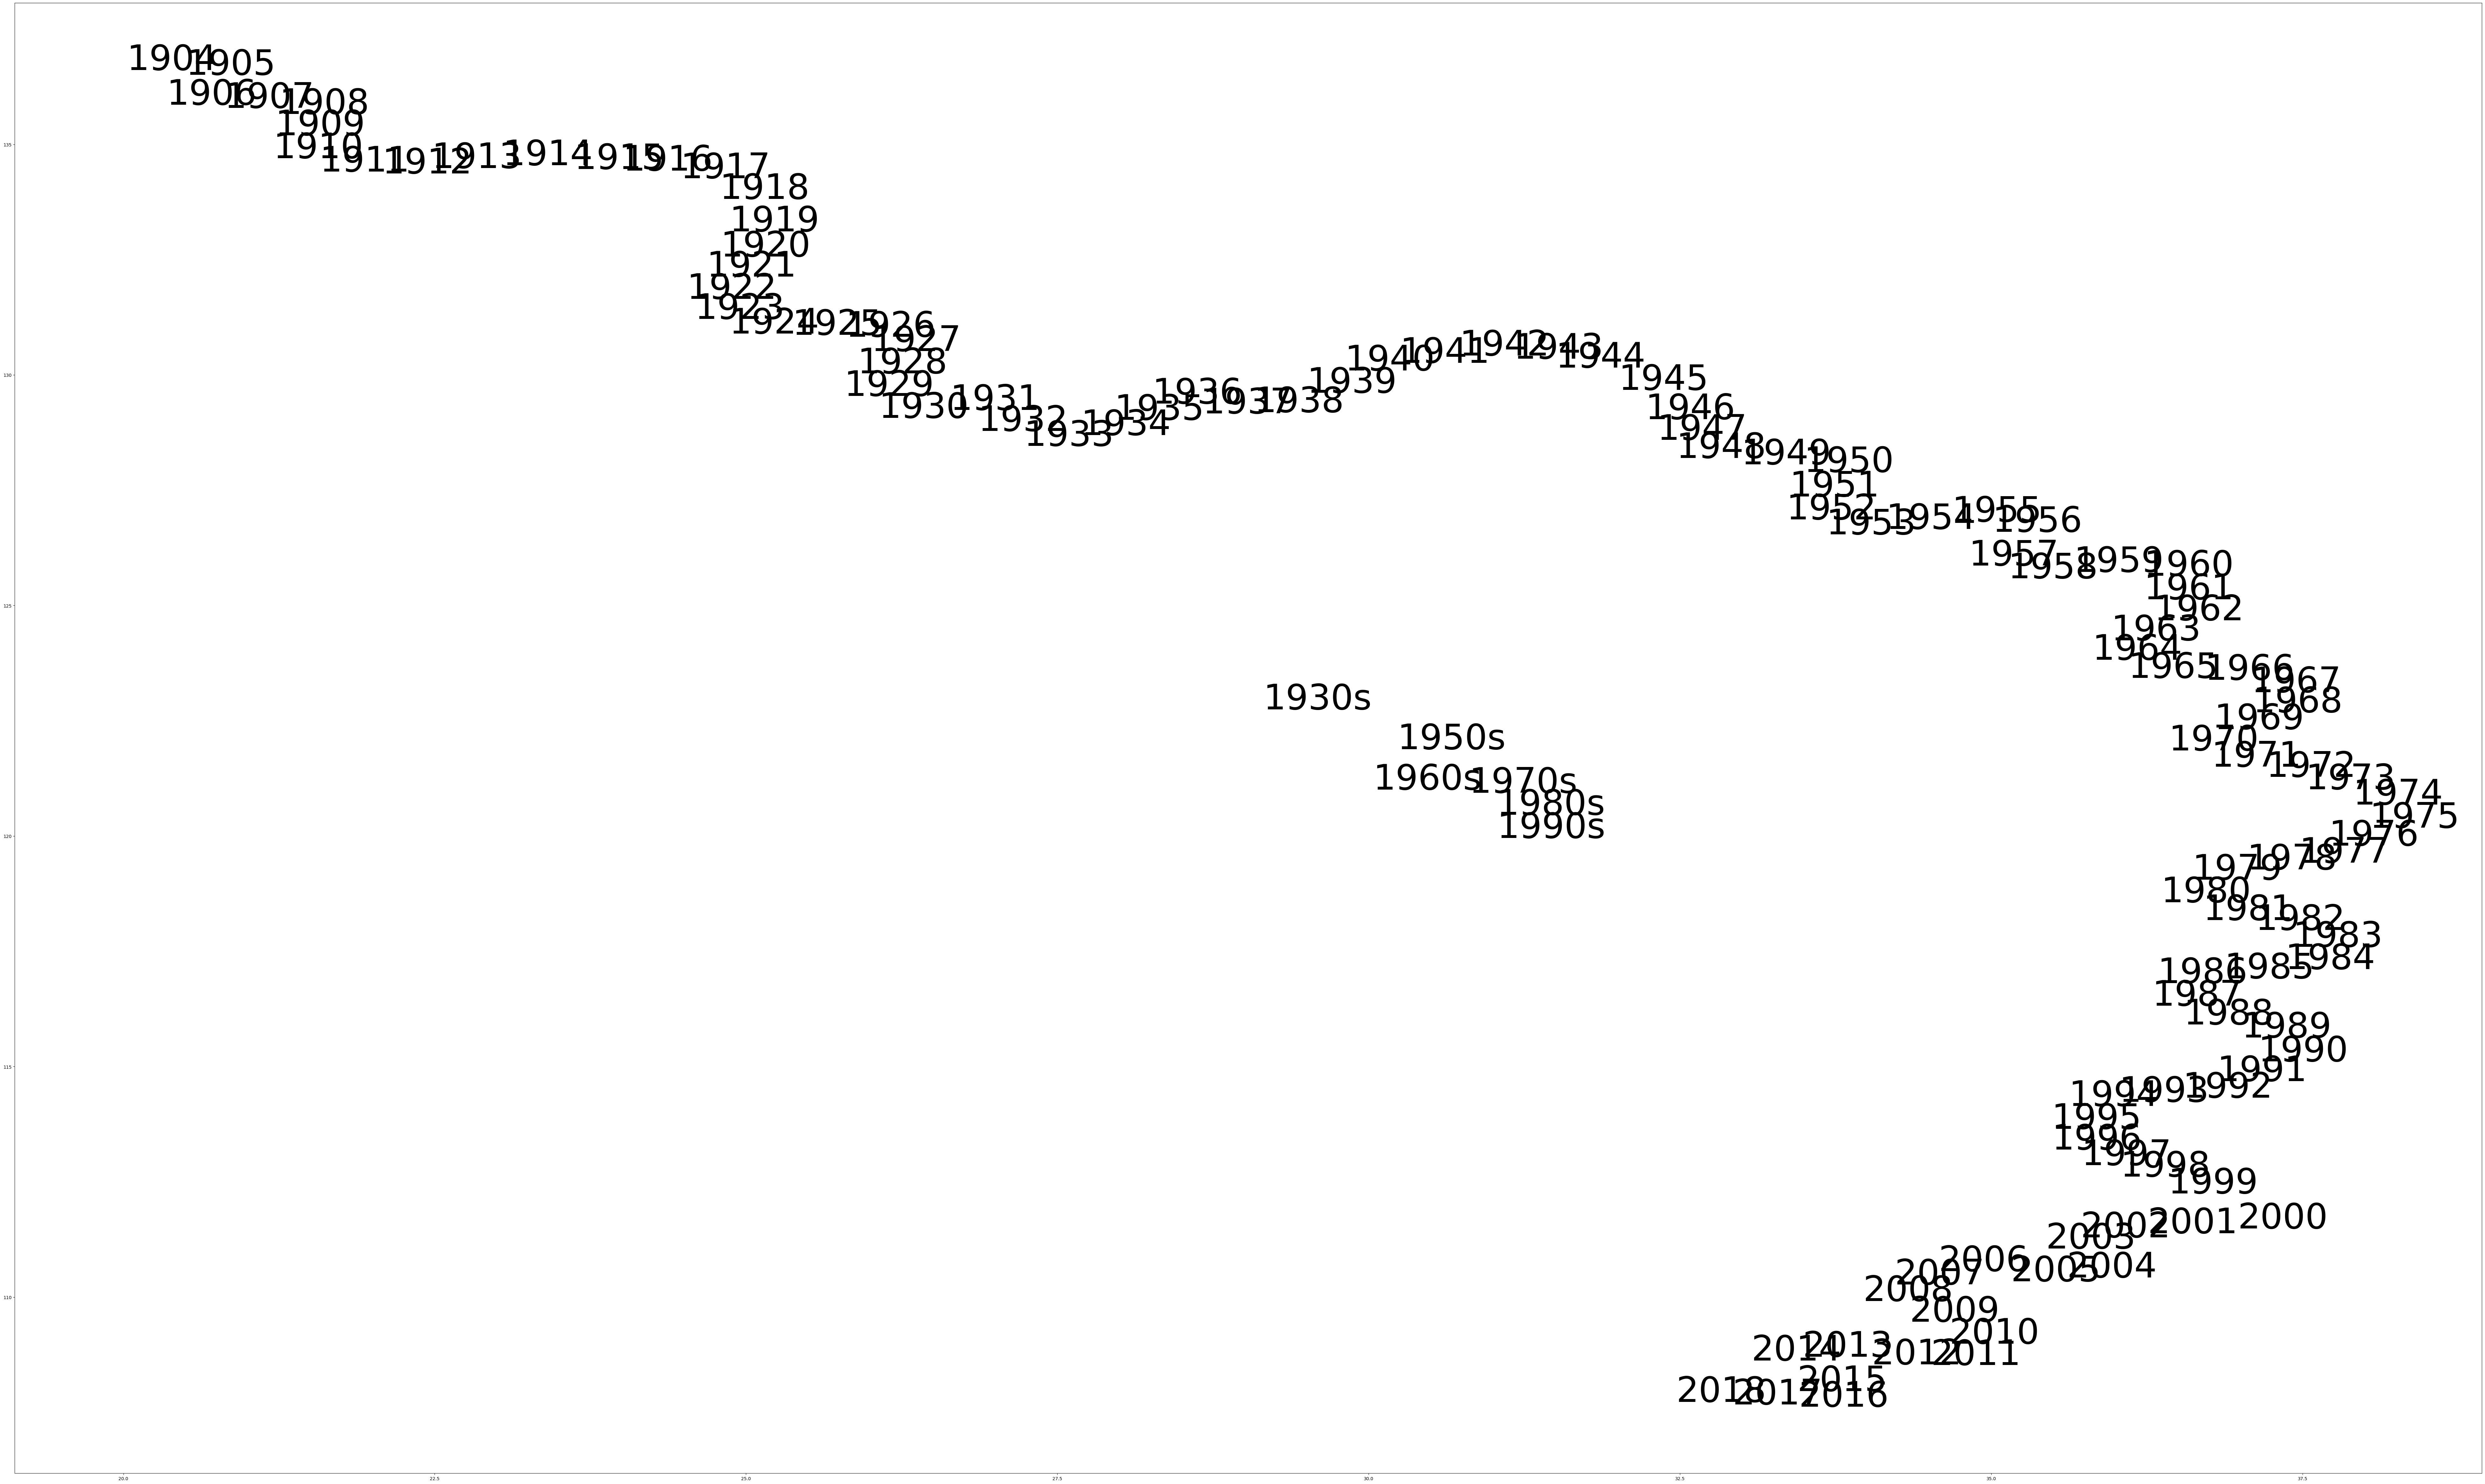

In [21]:
x_min, x_max = 20, 50
y_min, y_max = 100, 150

filtered_indices = np.where((bert_word_embs_to_use_tsne[:, 0] >= x_min) &
                            (bert_word_embs_to_use_tsne[:, 0] <= x_max) &
                            (bert_word_embs_to_use_tsne[:, 1] >= y_min) &
                            (bert_word_embs_to_use_tsne[:, 1] <= y_max))[0]

plt.figure()
for i in filtered_indices:
    if i < len(bert_words_to_plot):
        plt.scatter(bert_word_embs_to_use_tsne[i, 0], bert_word_embs_to_use_tsne[i, 1], s=0)
        plt.text(bert_word_embs_to_use_tsne[i, 0], bert_word_embs_to_use_tsne[i, 1], bert_words_to_plot[i],family='sans-serif', fontsize=80)

plt.show();